 Analysis of satellite images of different types of terrain using a convolutional neural network. Dataset taken from:

 https://www.kaggle.com/datasets/mahmoudreda55/satellite-image-classification

In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import pathlib
import PIL
import cv2
import numpy as np
import pandas as pd
import seaborn as sn

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow import keras
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from keras import Sequential

In [ ]:
data_dir = "/content/drive/MyDrive/data (1)"
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('/content/drive/MyDrive/data (1)')

In [ ]:
list(data_dir.glob("*/*.jpg"))

In [ ]:
image_count = len(list(data_dir.glob("*/*.jpg")))
image_count

5641

In [ ]:
clouds = list(data_dir.glob("cloudy/*"))
len(clouds)

1500

In [ ]:
deserts = list(data_dir.glob("desert/*"))
len(deserts)

1131

In [ ]:
greens = list(data_dir.glob("green_area/*"))
len(greens)

1500

In [ ]:
water = list(data_dir.glob("water/*"))
len(water)

1510

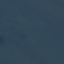

In [ ]:
PIL.Image.open(str(water[0]))

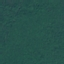

In [ ]:
PIL.Image.open(str(greens[0]))

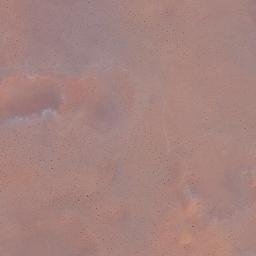

In [ ]:
PIL.Image.open(str(deserts[0]))

In [ ]:
# PIL.Image.open(str(clouds[0]))

In [ ]:
images = {
    "clouds": clouds,
    "deserts": deserts,
    "green_areas": greens,
    "water": water

}

In [ ]:
images["clouds"]

In [ ]:
images_labels = {
    "clouds": 0,
    "deserts": 1,
    "green_areas": 2,
    "water": 3,
}

In [ ]:
img = cv2.imread(str(images["clouds"][0]))

In [ ]:
img.shape

(256, 256, 3)

array([[[149, 162, 166],
        [149, 162, 164],
        [149, 162, 163],
        ...,
        [131, 147, 153],
        [128, 146, 150],
        [126, 144, 148]],

       [[148, 162, 167],
        [148, 162, 166],
        [149, 162, 166],
        ...,
        [133, 150, 155],
        [131, 148, 153],
        [128, 146, 151]],

       [[148, 163, 167],
        [148, 163, 168],
        [148, 163, 170],
        ...,
        [137, 153, 159],
        [135, 152, 157],
        [132, 150, 154]],

       ...,

       [[187, 199, 205],
        [188, 200, 206],
        [189, 202, 208],
        ...,
        [164, 176, 181],
        [163, 174, 182],
        [161, 173, 183]],

       [[185, 197, 204],
        [186, 199, 205],
        [188, 201, 207],
        ...,
        [165, 177, 181],
        [164, 175, 181],
        [161, 173, 181]],

       [[183, 196, 204],
        [185, 198, 205],
        [187, 200, 207],
        ...,
        [166, 178, 182],
        [165, 176, 180],
        [162, 174, 180]]], dtype=uint8)
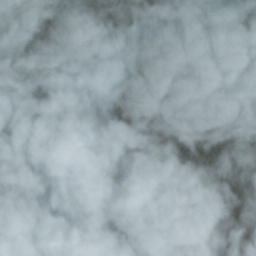

In [ ]:
img

In [ ]:
for name, image_batch in images.items():
    print(name)
    print(len(image_batch))

clouds
1500
deserts
1131
green_areas
1500
water
1510


In [ ]:
features = []
labels = []
for name, image_batch in images.items():
    for image in image_batch:
        image = cv2.imread(str(image))
        resized_image = cv2.resize(image, (256, 256))
        features.append(resized_image)
        labels.append(images_labels[name])


In [ ]:
features = np.array(features)
labels = np.array(labels)

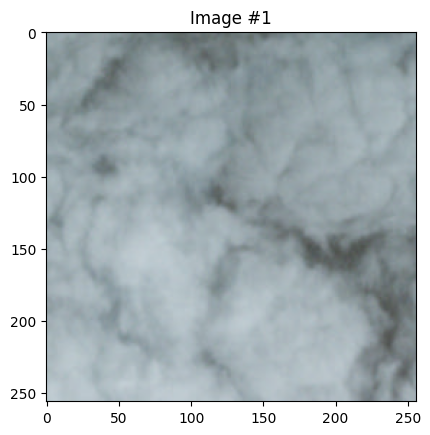

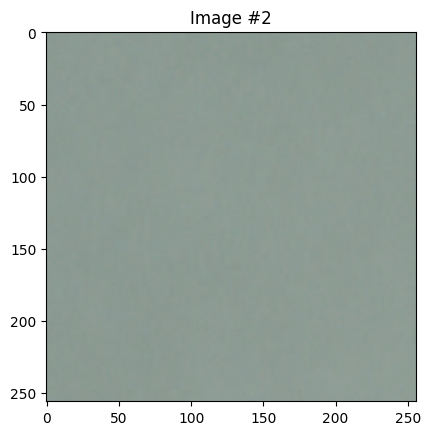

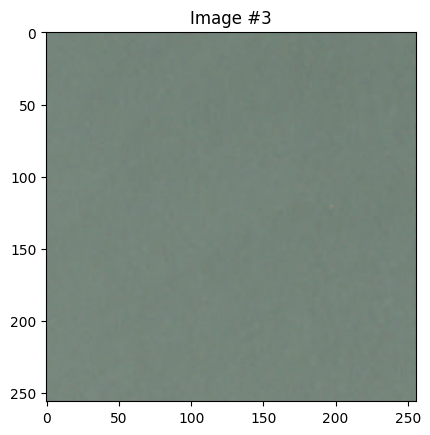

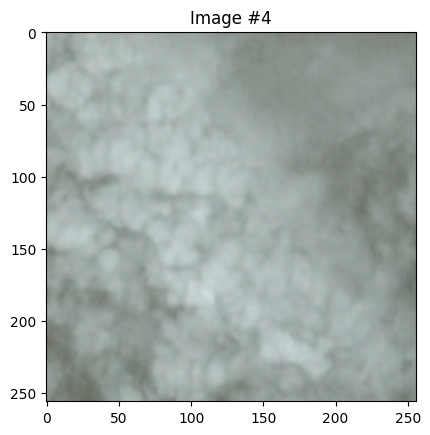

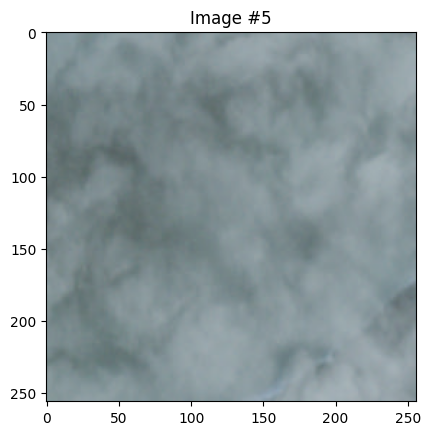

In [ ]:
def show_images(itter, array):
    for i in range(itter):
        plt.imshow(array[i])
        plt.title(f'Image #{i+1}')
        plt.show()


show_images(5, features)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)


In [ ]:
print(x_train.shape)
print(x_test.shape)

print(y_train.shape)
print(y_test.shape)

(4512, 256, 256, 3)
(1129, 256, 256, 3)
(4512,)
(1129,)


In [ ]:
# x_train_scaled = x_train/255
# x_test_scaled = x_test/255

In [ ]:
model = Sequential([
    Conv2D(filters=8, kernel_size=(4, 4), padding="same", activation="relu", input_shape=(256, 256, 3)),
    MaxPooling2D((3, 3)),
    Conv2D(filters=16, kernel_size=(4, 4), padding="same", activation="relu"),
    MaxPooling2D((3, 3)),
    Conv2D(filters=32, kernel_size=(4, 4), padding="same", activation="relu"),
    MaxPooling2D((3, 3)),

    Flatten(),
    Dense(50.000, activation="relu"),
    Dropout(0.5),
    Dense(5000, activation="relu"),
    Dropout(0.5),
    Dense(900, activation="relu"),
    Dropout(0.3),
    Dense(200, activation="relu"),

    Dense(90, activation="relu"),
    Dense(50, activation="relu"),
    Dense(20, activation="relu"),
    Dense(11, activation="relu"),
    Dense(7, activation="relu"),
    Dense(4, activation="softmax"),


])


model.compile(
    optimizer="SGD",
    loss = "sparse_categorical_crossentropy",
    metrics=(["accuracy"])
)

In [ ]:
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
141/141 [==============================] - 6s 22ms/step - loss: 1.1577 - accuracy: 0.4238
Epoch 2/100
141/141 [==============================] - 3s 18ms/step - loss: 0.9906 - accuracy: 0.5228
Epoch 3/100
141/141 [==============================] - 2s 18ms/step - loss: 0.9176 - accuracy: 0.5667
Epoch 4/100
141/141 [==============================] - 2s 17ms/step - loss: 0.8601 - accuracy: 0.5966
Epoch 5/100
141/141 [==============================] - 3s 18ms/step - loss: 0.7498 - accuracy: 0.6343
Epoch 6/100
141/141 [==============================] - 3s 20ms/step - loss: 0.7696 - accuracy: 0.6159
Epoch 7/100
141/141 [==============================] - 3s 19ms/step - loss: 0.7026 - accuracy: 0.6367
Epoch 8/100
141/141 [==============================] - 3s 18ms/step - loss: 0.6268 - accuracy: 0.6631
Epoch 9/100
141/141 [==============================] - 3s 18ms/step - loss: 0.6178 - accuracy: 0.6609
Epoch 10/100
141/141 [==============================] - 2s 18ms/step - loss: 0.646

In [ ]:
model.evaluate(x_test, y_test)

36/36 [==============================] - 1s 10ms/step - loss: 0.3213 - accuracy: 0.8521


[0.3213014304637909, 0.8520814776420593]

array([[[117, 129, 177],
        [109, 121, 169],
        [118, 130, 178],
        ...,
        [121, 127, 174],
        [120, 126, 173],
        [118, 124, 171]],

       [[115, 127, 175],
        [110, 122, 170],
        [114, 126, 174],
        ...,
        [119, 125, 172],
        [119, 125, 172],
        [119, 125, 172]],

       [[113, 125, 173],
        [115, 127, 175],
        [111, 123, 171],
        ...,
        [116, 122, 167],
        [118, 124, 169],
        [119, 125, 170]],

       ...,

       [[121, 122, 156],
        [121, 122, 156],
        [120, 121, 155],
        ...,
        [124, 130, 167],
        [124, 130, 167],
        [124, 130, 167]],

       [[121, 121, 157],
        [121, 121, 157],
        [122, 122, 158],
        ...,
        [123, 129, 166],
        [123, 129, 166],
        [123, 129, 166]],

       [[121, 121, 157],
        [122, 122, 158],
        [124, 124, 160],
        ...,
        [122, 128, 165],
        [122, 128, 165],
        [122, 128, 165]]], dtype=uint8)
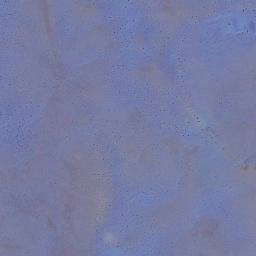

In [ ]:
x_test[0]

In [ ]:
list_of_preds = ["clouds", "deserts", "green_areas",  "water"]

image = np.expand_dims(x_test[0], axis=0)
prediction = model.predict(image)
list_of_preds[np.argmax(prediction)]

1/1 [==============================] - 0s 31ms/step


'deserts'

In [ ]:
preds_list = []
preds_frame = model.predict(x_test)
for pred in preds_frame:
    preds_list.append(np.argmax(pred))

preds_list = np.array(preds_list)


compare_frame = pd.DataFrame({"Predictions: ":  preds_list.squeeze(), "Actuals": y_test.squeeze()})
compare_frame

# preds_list

36/36 [==============================] - 0s 11ms/step


,Predictions:,Actuals
0,1,1
1,0,0
2,3,3
3,0,1
4,0,0
...,...,...
1124,2,2
1125,0,0
1126,3,3
1127,3,2


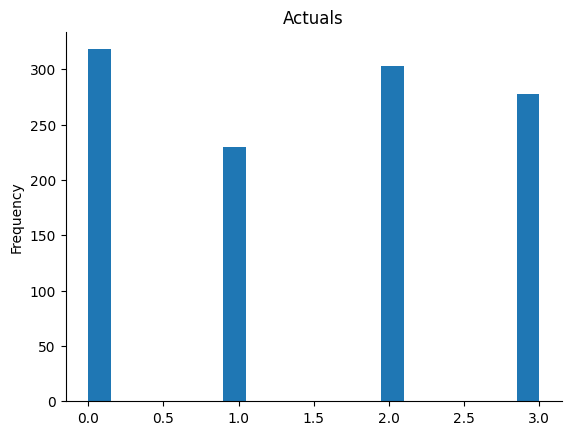

In [ ]:
# @title Actuals

from matplotlib import pyplot as plt
compare_frame['Actuals'].plot(kind='hist', bins=20, title='Actuals')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
preds = model.predict(x_test)
preds = np.argmax(preds, axis=1)
cm = confusion_matrix(y_test, preds)
cm

36/36 [==============================] - 0s 9ms/step


array([[302,   0,   1,  15],
       [120, 110,   0,   0],
       [  0,   0, 296,   7],
       [  1,   0,  23, 254]])

Text(158.22222222222223, 0.5, 'Actuals')

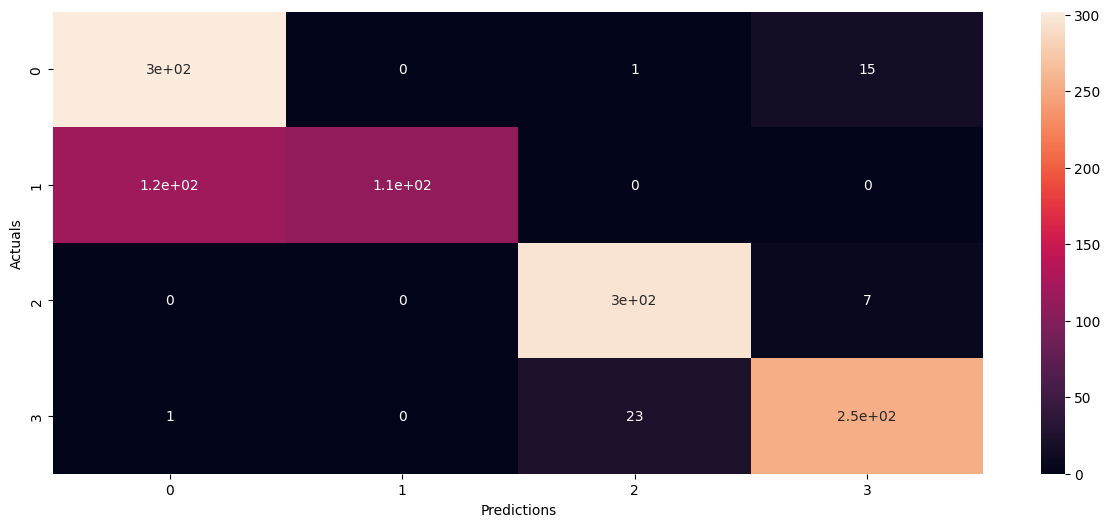

In [ ]:
plt.figure(figsize=(15, 6))
sn.heatmap(cm, annot=True)
plt.xlabel("Predictions")
plt.ylabel("Actuals")
